Aerogeophysical Spectrometric Data for eU

1. Installing Required Libraries

In [ ]:
pip install rasterio numpy matplotlib scipy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 38.9 MB/s eta 0:00:00


2. Applying Filter and Normalising the Raster Data and Plotting the Data Layer

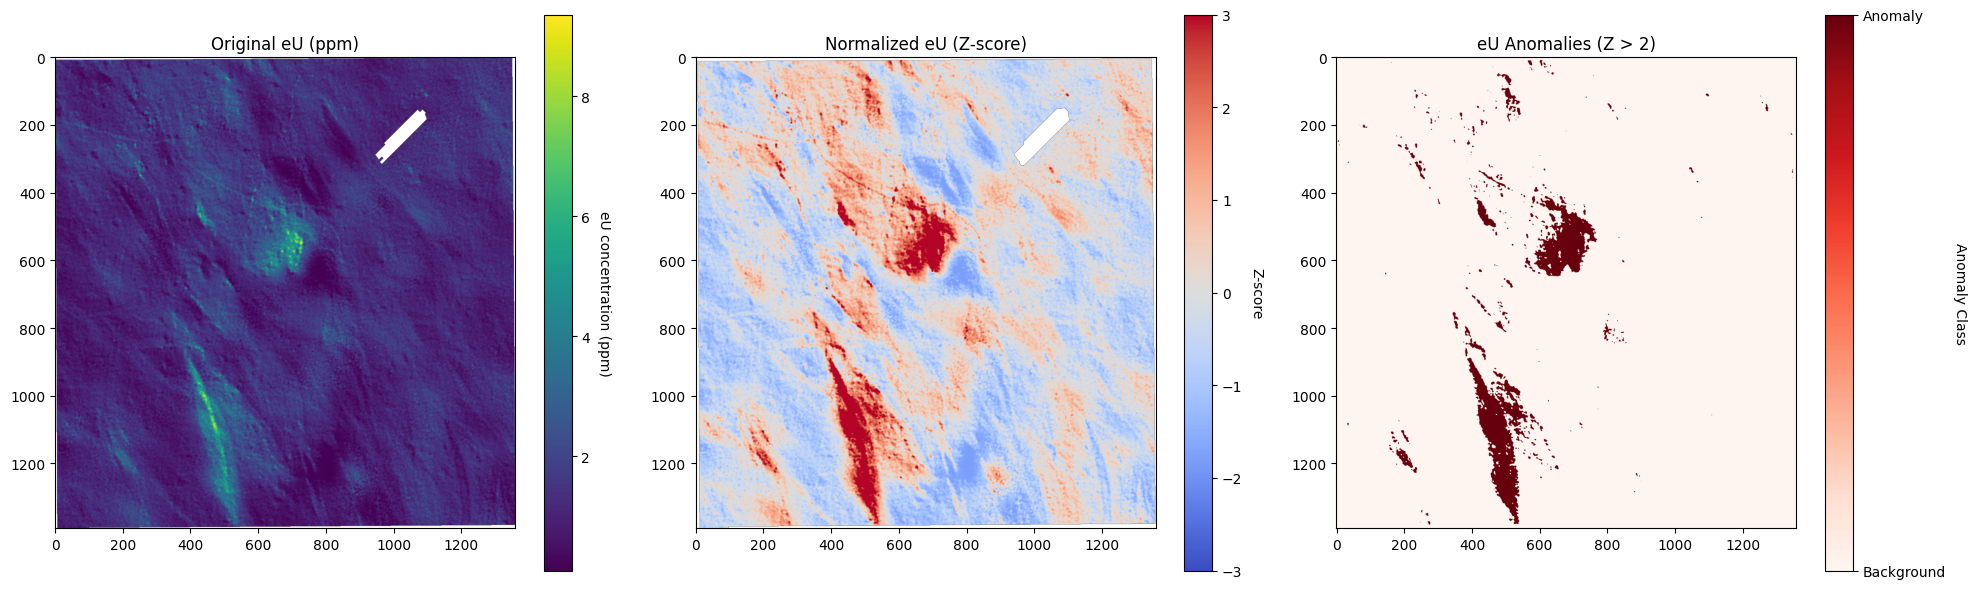

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Step 1: Load the eU raster
input_path = ".tif"  # Replace with your file path

with rasterio.open(input_path) as src:
    eu_data = src.read(1)
    profile = src.profile

# Step 2: Mask no-data values
eu_data = np.where(eu_data == profile['nodata'], np.nan, eu_data)

# Step 3: Apply Gaussian Filter (Smoothing)
smoothed_eu = gaussian_filter(eu_data, sigma=1)

# Step 4: Normalize (Z-score normalization)
mean = np.nanmean(smoothed_eu)
std = np.nanstd(smoothed_eu)
normalized_eu = (smoothed_eu - mean) / std

# Step 5: Thresholding
threshold = 2  # Anomaly cutoff
anomaly_mask = normalized_eu > threshold

# Optional: Save Anomaly Raster
output_path = "eu_anomaly_mask.tif"
with rasterio.open(output_path, 'w', **profile) as dst:
    dst.write(anomaly_mask.astype(rasterio.uint8), 1)

# Step 6: Plot with Colorbars (Legends)
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Original eU
img0 = axs[0].imshow(eu_data, cmap='viridis')
axs[0].set_title("Original eU (ppm)")
cbar0 = plt.colorbar(img0, ax=axs[0])
cbar0.set_label('eU concentration (ppm)', rotation=270, labelpad=15)

# Normalized
img1 = axs[1].imshow(normalized_eu, cmap='coolwarm', vmin=-3, vmax=3)
axs[1].set_title("Normalized eU (Z-score)")
cbar1 = plt.colorbar(img1, ax=axs[1])
cbar1.set_label('Z-score', rotation=270, labelpad=15)

# Anomaly mask
img2 = axs[2].imshow(anomaly_mask, cmap='Reds')
axs[2].set_title(f"eU Anomalies (Z > {threshold})")
cbar2 = plt.colorbar(img2, ax=axs[2], ticks=[0, 1])
cbar2.ax.set_yticklabels(['Background', 'Anomaly'])
cbar2.set_label('Anomaly Class', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()


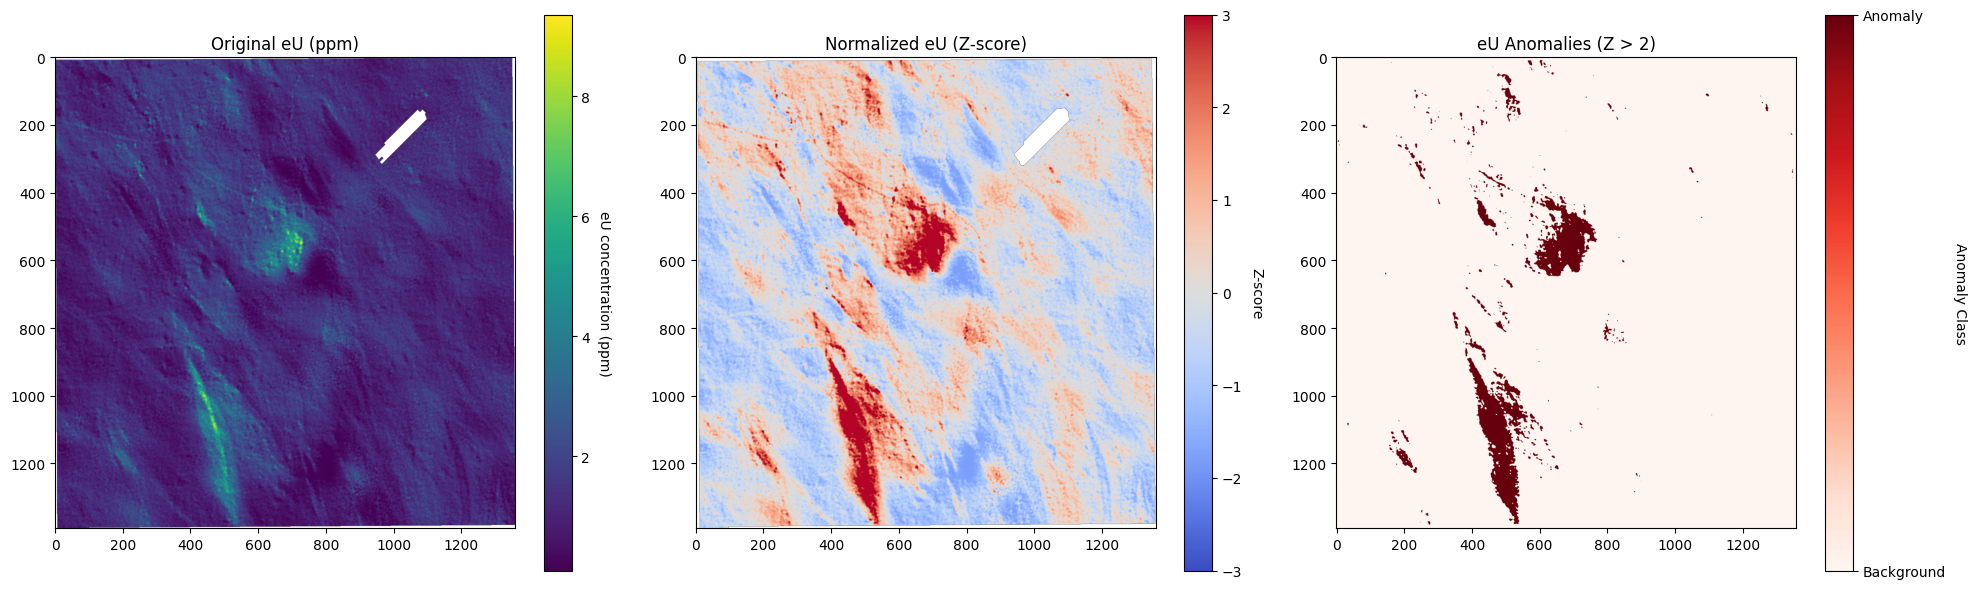

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Make sure these arrays are already defined:
# eu_data        -> Original eU raster (with NaNs for nodata)
# normalized_eu  -> Z-score normalized raster
# anomaly_mask   -> Binary anomaly layer (1 = anomaly, 0 = background)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1: Original eU data
img0 = axs[0].imshow(eu_data, cmap='viridis')
axs[0].set_title("Original eU (ppm)")
cbar0 = plt.colorbar(img0, ax=axs[0])
cbar0.set_label('eU concentration (ppm)', rotation=270, labelpad=15)

# Plot 2: Normalized Z-score
img1 = axs[1].imshow(normalized_eu, cmap='coolwarm', vmin=-3, vmax=3)
axs[1].set_title("Normalized eU (Z-score)")
cbar1 = plt.colorbar(img1, ax=axs[1])
cbar1.set_label('Z-score', rotation=270, labelpad=15)

# Plot 3: Anomaly map
img2 = axs[2].imshow(anomaly_mask, cmap='Reds')
axs[2].set_title("eU Anomalies (Z > 2)")
cbar2 = plt.colorbar(img2, ax=axs[2], ticks=[0, 1])
cbar2.ax.set_yticklabels(['Background', 'Anomaly'])
cbar2.set_label('Anomaly Class', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()


3. Plotting background Z < 2

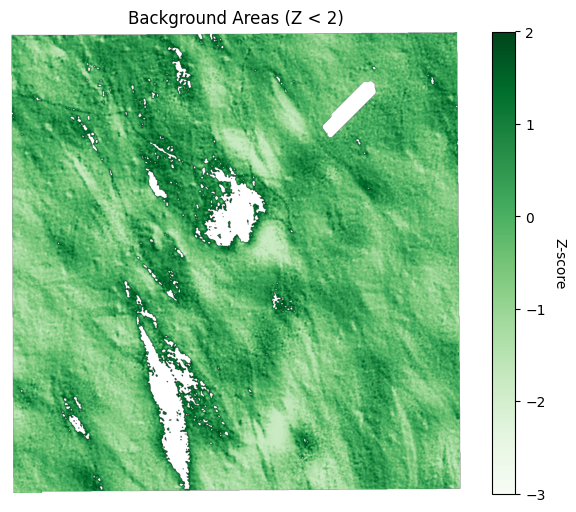

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Mask Z >= 2 (i.e., keep only Z < 2)
background_mask = np.where(normalized_eu < 2, normalized_eu, np.nan)

# Plot background areas only
plt.figure(figsize=(8, 6))
img = plt.imshow(background_mask, cmap='Greens', vmin=-3, vmax=2)
plt.title("Background Areas (Z < 2)")
cbar = plt.colorbar(img)
cbar.set_label('Z-score', rotation=270, labelpad=15)
plt.axis('off')
plt.show()


4. Extracting the Output Data

In [ ]:
output_tif = "background_z_less_than_2.tif"
# Get the profile from the original raster (assuming 'profile' is already defined)
output_profile = profile.copy()

# Update the data type in the profile if needed
output_profile.update(dtype=rasterio.float32)

with rasterio.open(output_tif, 'w', **output_profile) as dst:
    dst.write(background_mask.astype('float32'), 1)

print(f"Background (Z < 2) raster saved to: {output_tif}")

Background (Z < 2) raster saved to: background_z_less_than_2.tif
